In [2]:
import numpy as np
import os
import sys
sys.path.append('../')
import mlx as ml 
import warnings
import operator
import pickle
import glob
import pylab as plt
%matplotlib inline
import pandas as pd
from tqdm import tqdm
DEBUG=False
import seaborn as sns

def loadTree(PATH_TO_TREES):
    TREE={}
    TREES=glob.glob(PATH_TO_TREES)
    for filename in tqdm(TREES):
        with open(filename,'rb') as f:
            TR = pickle.load(f)
            #TREE[filename]=TR
        f.close()
        index=os.path.splitext(os.path.basename(filename))[0].split('_')[-1]
        TREE[index]=TR
    return TREE
PATH_TO_TREES='../../cchf/cchfl_trees/*pkl'


In [3]:
TREE=loadTree(PATH_TO_TREES)

100%|██████████| 4842/4842 [00:03<00:00, 1612.06it/s]


In [4]:
A={}
for I,TR in TREE.iteritems():
    #print TR.feature,TR.TREE_LEAF
    preds={key:val for (key,val) 
           in TR.feature.iteritems() 
           if not TR.TREE_LEAF[key]}
    for (key,val) in preds.iteritems():
        if (int(I.replace('P','')),int(val.replace('P',''))) in A:
            A[(int(I.replace('P','')),int(val.replace('P','')))]=A[(int(I.replace('P','')),int(val.replace('P','')))]+1
            #print I,val,A[(int(I.replace('P','')),int(val.replace('P','')))]
        else:
            A[(int(I.replace('P','')),int(val.replace('P','')))]=1
     

In [5]:
D=np.zeros([4886,4886])
count=0
for (key,val) in A.iteritems():
    count=count+1
    D[key[0],key[1]]=val
print count

8689


In [6]:
import pylab as plt

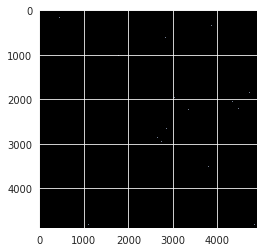

In [13]:
plt.imshow(D,cmap='bone')

In [7]:
D

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
Df=pd.DataFrame(D)

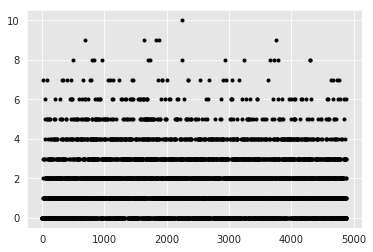

In [15]:
plt.plot(Df.sum().values,'k.')

(array([1.087e+03, 1.311e+03, 1.128e+03, 7.170e+02, 3.640e+02, 0.000e+00,
        1.540e+02, 7.300e+01, 3.200e+01, 1.400e+01, 5.000e+00, 1.000e+00]),
 array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
         4.16666667,  5.        ,  5.83333333,  6.66666667,  7.5       ,
         8.33333333,  9.16666667, 10.        ]),
 <a list of 12 Patch objects>)

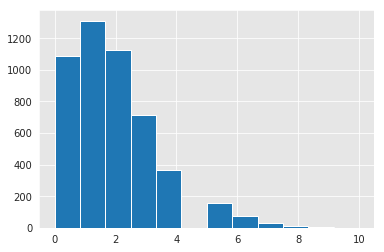

In [17]:
plt.hist(Df.sum().values,12)

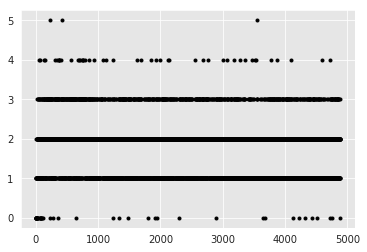

In [16]:
plt.plot(Df.sum(axis=1).values,'k.')

(array([  44.,    0., 1666.,    0., 2473.,    0.,    0.,  654.,    0.,
          46.,    0.,    3.]),
 array([0.        , 0.41666667, 0.83333333, 1.25      , 1.66666667,
        2.08333333, 2.5       , 2.91666667, 3.33333333, 3.75      ,
        4.16666667, 4.58333333, 5.        ]),
 <a list of 12 Patch objects>)

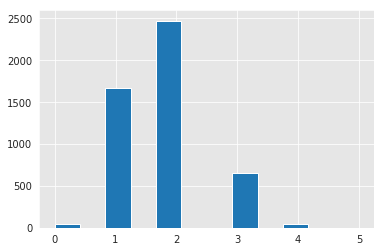

In [18]:
 plt.hist(Df.sum(axis=1).values,12)

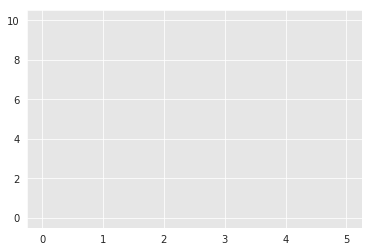

In [32]:
plt.scatter(Df.sum(axis=1).values,Df.sum().values,s=10000*Df.median().values)

In [35]:
np.argsort(D[2000,:])

array([   0, 3260, 3259, ..., 1628, 4885, 4831])

In [36]:
D[2000,4831]

1.0

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
clustering=AgglomerativeClustering(affinity='precomputed',
                                   linkage='average',
                                   n_clusters=4)

clustering.fit(D)

l=clustering.labels_

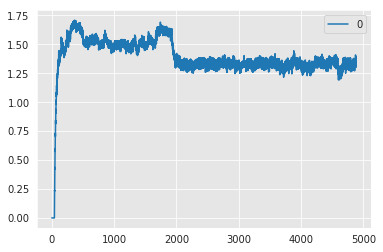

In [76]:
pd.DataFrame(l).ewm(com=30).mean().plot()

In [77]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(D)
X_embedded.shape

(4886, 2)

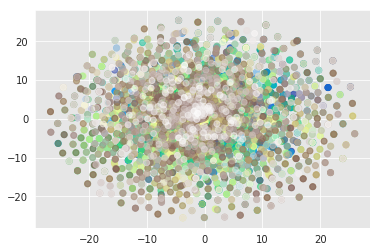

In [93]:

plt.scatter(X_embedded[:,0],X_embedded[:,1],c=range(len(X_embedded)),cmap='terrain',alpha=.5)